# Analysis with Hypernetx package<sup>1</sup>
<pre>
Dataset is of murine hematapoietic stem and progenitor cells (HSPCs)<sup>2</sup>. 
TODO: ref other things like locaTE
References:
[1] https://github.com/pnnl/HyperNetX

[2] Marot-Lassauzaie V, Bouman BJ, Donaghy FD, Demerdash Y, Essers MAG, Haghverdi L (2022) Towards reliable quantification of cell state velocities. 
    PLoS Comput Biol 18(9): e1010031. https://doi.org/10.1371/journal.pcbi.1010031
</pre>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hypernetx as hnx
import model
import utils
import glob

# Initialization

In [2]:
# 2430 cells and 50 TFs
cell_count = 2430
gene_count = 50
infile_dir = "./../data/TEsHSPC/"
# labels_df = pd.read_csv('./../../locaTE.jl/examples/HSPC/mydata/genes.csv')
# labels = labels_df.values[:, 1]
# with open(infile_dir + 'gene_labels.pickle', 'wb') as outstream:
#     pickle.dump(labels, outstream) 


# Graph Construction

In [3]:
m = model.HyperGraph(n_cells=cell_count, n_genes=gene_count, infile_dir=infile_dir)
m.construct_graph(0.75) # TODO: tolerance chosen arbitrarily, better way? 
# HG = hnx.classes.Hypergraph.collapse_nodes_and_edges(m.HG) 
HG = m.HG

# HNX Exploration

In [4]:
L, index = hnx.algorithms.laplacians_clustering.norm_lap(HG, weights=True)
L = L.toarray()

In [5]:
eigvals, eigvecs = np.linalg.eig(L)

# sort eigenvals, then sort eigenvecs by the eigenvals
sorted_indices = np.flip(np.argsort(eigvals))
sorted_eigvals = eigvals[sorted_indices] # sort the vals
sorted_eigvecs = eigvecs[:,sorted_indices] # sorts the columns

# Sanity check to ensure eigenvecs got sorted
eps = 0.0001
min_index = np.argmin(eigvals)
if (np.sum(np.abs(np.abs(eigvecs[:,min_index]) - np.abs(sorted_eigvecs[:,L.shape[0] - 1])) < eps) != L.shape[0]):
    raise ValueError("Incorrectly sorted eigenvalues")


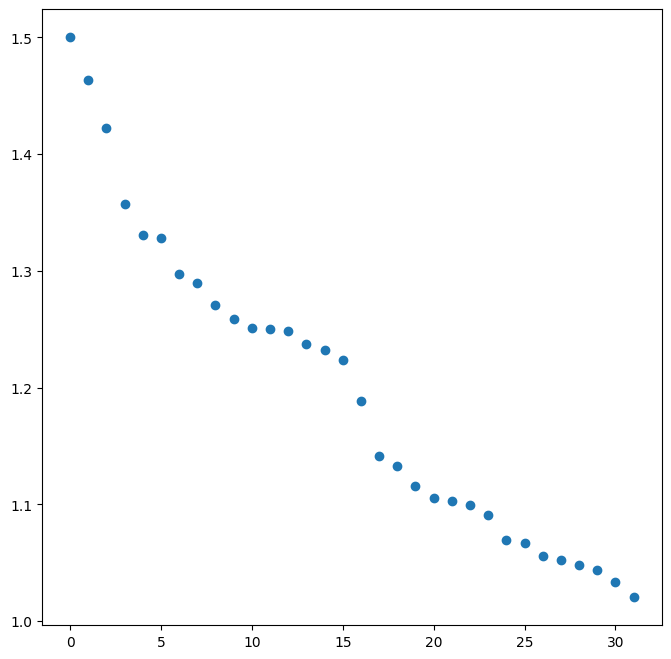

In [7]:
x = np.arange(L.shape[0])
plt.scatter(x, sorted_eigvals)

In [12]:
clusters = hnx.algorithms.laplacians_clustering.spec_clus(HG, k=3, weights=True)
clusters

{0: ['Mecom',
  'Meis1',
  'Cenpa',
  'Gfi1b',
  'Zfpm1',
  'Myb',
  'Zbtb20',
  'Hmgb2',
  'Zfp608',
  'Myc',
  'Mef2c',
  'Klf6',
  'Hmgb3',
  'Pou2f2',
  'Tsc22d1',
  'Pbx1',
  'Nfia',
  'Klf1',
  'Spi1',
  'Zfp36l1'],
 1: ['Ikzf2', 'Satb1', 'Dach1', 'Nfe2', 'Irf8', 'Gfi1', 'Hlf'],
 2: ['Ets1', 'Gata2', 'Gata1', 'Plek', 'Cebpe']}